In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib inline

mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["font.size"] = 11

from functools import partial, reduce
from itertools import product

import seaborn as sns


from analyze_data import result, get_summary

from create_figures import add_p_bars, boxplot, add_multilevel_xticks, lineplot

folder = '/media/raphael/PortableSSD/diploma_thesis/Data'

In [52]:
f = result().read(f"{folder}/2. Plasmid can degrade soluable GFP-tagged α-Synuclein/Flourometry/Results.csv")
f.summarize(values = "Mean_norm").head()

,mean,sd,ci_lo,ci_hi,count
Group1,,,,,
X,1.000000,0.165195,0.921256,1.079246,16
TP,0.506013,0.199564,0.406173,0.601610,16
FY,0.905390,0.289088,0.770228,1.051329,16


In [53]:
f.create_p_table().round(decimals=3).head()

,Group1,p,star
Group1,,,
X,TP,0.00,****
X,FY,0.14,ns


/tmp/ipykernel_10810/1877942167.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Ctrl","TP","FY"])


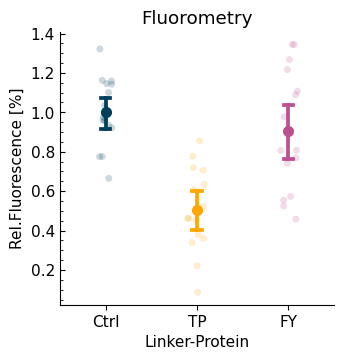

In [54]:
from matplotlib.ticker import AutoMinorLocator

def prettify(ax, *args,
             title = None,
             x = ("x-axis", ""),
             y = ("y-axis", ""),
             **kwargs):
    ax.set_title(title)
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_xlabel(x[0] if len(x[1])==0 else f"{x[0]} [{x[1]}]")
    ax.set_ylabel(y[0] if len(y[1])==0 else f"{y[0]} [{y[1]}]")
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which = "both", 
                   direction = "in")
    return ax

def prettify_pointplot(ax):
    ax.tick_params(bottom = True)
    return ax

def pointplot(data, 
                x=None, 
                y=None ,
                hue = None,
                ax=None, 
                y_scale = 1,
                rm_outliers = False,
                thin = 1,
                jitter = 0.2,
                d_bool = False,
                palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"],
                **kwargs):
    if x == hue:
        d_bool = False
        dodge = False
    sns.stripplot(
    data=data, x=x, y=y, hue=hue,
    dodge=d_bool, alpha=.2, legend=False,
    palette=palette,
    ax=ax
    )
    sns.pointplot(
        data=data, x=x, y=y, hue=hue,
        dodge=dodge, errorbar="ci",
        marker="o", markersize=5, markeredgewidth=3,
        capsize = 0.1,
        ax=ax,
        palette=palette
    )
    
    return ax

fig1,ax = plt.subplots(figsize = (3.54,3.54))
ax = pointplot(data = f.df,
                 x = "Group1",
                 y = "Mean_norm",
                 hue = "Group1",
                 y_scale = 1,
                 jitter = 0.4,
                 ax=ax)
ax = prettify(ax,
              title = "Fluorometry",
              x = ("Linker-Protein",""),
              y = ("Rel.Fluorescence","%"))
ax = prettify_pointplot(ax)
ax.tick_params(axis = "x",which = "both", 
                   direction = "out")
ax.set_xticklabels(["Ctrl","TP","FY"])
fig1.tight_layout
fig1.savefig("../../plots/Fig2_Fluorometry.svg", format = "svg")

# Densitometry


In [55]:
d = result().read(f"{folder}/2. Plasmid can degrade soluable GFP-tagged α-Synuclein/WB/Results.csv")
d.summarize(values = "aSyn_norm").head()

,mean,sd,ci_lo,ci_hi,count
Group1,,,,,
X,1.000000,0.000000,1.000000,1.000000,3
TP,0.794452,0.080762,0.680237,0.851560,3
FY,0.718861,0.053486,0.643220,0.756681,3


In [56]:
d.create_p_table().round(decimals=3).head()

/home/raphael/miniforge3/envs/mdthesis/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Group1,p,star
Group1,,,
X,TP,0.011,*
X,FY,0.001,***


/tmp/ipykernel_10810/771376101.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Ctrl","TP","FY"])


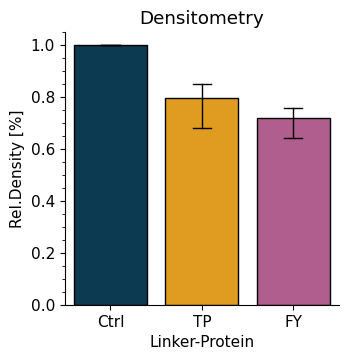

In [57]:
fig2,ax = plt.subplots(figsize = (3.54,3.54))
ax = sns.barplot(data = d.df,
                x = "Group1",
                y = "aSyn_norm",
                hue = "Group1",
                legend = False,
                ax = ax,
                palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"],
                seed = 888,
                alpha = 1,
                capsize = 0.2,
                err_kws = {
                     "linewidth": 1,
                     "color":"0"
                })
ax = sns.barplot(data = d.df,
                x = "Group1",
                y = "aSyn_norm",
                ax = ax,
                color = "k",
                fill = False,
                linewidth = 1,
                errorbar = None)
ax = prettify(ax,
              title = "Densitometry",
              x = ("Linker-Protein",""),
              y = ("Rel.Density","%"))
ax.set_xticklabels(["Ctrl","TP","FY"])
ax.tick_params(axis = "x",direction = "out")
ax.tick_params(axis = "y",which="both",direction = "out")
fig2.tight_layout
fig2.savefig("../../plots/Fig2_Dens.svg", format = "svg")

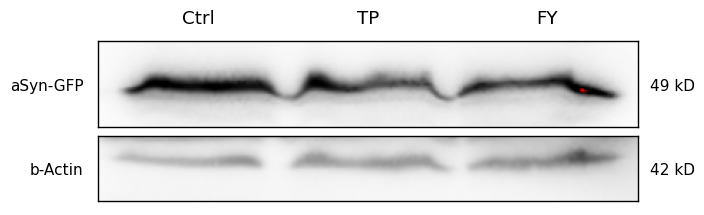

In [58]:
from create_figures import WesternBlot
import skimage as ski

image1 = ski.io.imread(f"{folder}/2. Plasmid can degrade soluable GFP-tagged α-Synuclein/WB/Img_Final/0_aSyn.tif")
image2 = ski.io.imread(f"{folder}/2. Plasmid can degrade soluable GFP-tagged α-Synuclein/WB/Img_Final/1_b-Actin.tif")
fig3, ax = plt.subplots(figsize = (7.08, 3.54))
wb = (WesternBlot(border = 0.1)
      .add_lane(image = image2,
                protein ="b-Actin",
                weight = 42)
      .add_lane(image = image1,
                protein ="aSyn-GFP",
                weight = 49)
      .add_labels(["Ctrl","TP","FY"])
      .plot(ax))

fig3.savefig("../../plots/Fig2_WB.svg", format = "svg",bbox_inches='tight')

In [59]:
# def plot_images(imgs, rescale = False):
#     fig, axs = plt.subplots(1,len(imgs),
#                             figsize = (len(imgs)*5,5))
#     for i,ax in enumerate(axs):
#         if not rescale:
#             ax.imshow(imgs[i],
#                     vmin = 0, vmax = 255,
#                     cmap = "grey")
#         else:
#             ax.imshow(imgs[i],
#                     cmap = "grey")
#     return

# img_x = ski.io.imread("E:\diploma_thesis\Data\X. Distribuion\FigureImg\X_AB.nd2 - C=0.tif")
# img_tp = ski.io.imread("E:\diploma_thesis\Data\X. Distribuion\FigureImg\TP_AB.nd2 - C=0.tif")
# img_fy = ski.io.imread("E:\diploma_thesis\Data\X. Distribuion\FigureImg\FY_AB.nd2 - C=0.tif")

# print(img_x.dtype)

# images = [ski.util.img_as_ubyte(img_x), 
#           ski.util.img_as_ubyte(img_tp), 
#           ski.util.img_as_ubyte(img_fy)]


# plot_images(images,rescale = True)


In [60]:
# p2, p98 = np.percentile(np.stack(images), (2, 98))
# rescaled_images = [ski.exposure.rescale_intensity(img, in_range=(p2, p98)) for img in images]
# plot_images(rescaled_images,rescale = False)

In [61]:
# class image_figure:
#     def __init__(self) -> None:
#         self.df = pd.DataFrame()
#         self.image_dic = {}
#         pass
    
#     def add_lane(self,
#                  images,
#                  y_label = "",
#                  x_labels = None):
#         if x_labels == None:
#             x_labels = np.arange(len(images))
#         for i,img in enumerate(images):
#             id = len(self.image_dic.keys())
#             self.image_dic[id] = img
#             self.df.loc[y_label,x_labels[i]] = id
#         return self
    
#     def add_rgb_lane(self):
#         return self
    
#     def add_labels(self):
#         return self
    
#     def plot(self, width = 10):
#         print(self.df.shape)
#         fig, axs = plt.subplots(*self.df.shape, figsize = (2.36,7.08))
#         print(self.df)
#         for i, (y_lab, row) in enumerate(self.df.iterrows()):
#             ax_row = axs
#             if self.df.shape[0] != 1:
#                 ax_row = axs[i]
#             for j, (x_lab, item) in enumerate(row.items()):
#                 ax = ax_row
#                 if self.df.shape[1] != 1:
#                     ax = ax_row[j]
#                 ax.imshow(self.image_dic[item],
#                     vmin = 0, vmax = 255,
#                     cmap = "grey")
#                 ax.tick_params(left = False,
#                                    bottom = False,
#                                    labelbottom = False,
#                                    labelleft = False)
#                 if i == 0:
#                     ax.tick_params(labeltop = True)
#                     ax.set_xticks([np.mean(ax.get_xlim())],
#                                              [x_lab])
#                 if j == 0:
#                     ax.tick_params(labelleft = True)
#                     ax.set_yticks([np.mean(ax.get_ylim())],
#                                             [y_lab])
#         #fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=-0.15)
#         fig.get_constrained_layout()
#         return fig
    

# fig = (image_figure().add_lane([rescaled_images[0]],
#                         x_labels= [""],
#                         y_label= "Ctrl")
#        .add_lane([rescaled_images[1]],
#                         x_labels= [""],
#                         y_label= "TP")
#        .add_lane([rescaled_images[2]],
#                         x_labels= [""],
#                         y_label= "FY")
#        .plot(width = 2.36))


# labels = ["Ctrl","TP","FY"]

# for i,ax in enumerate(fig.axes):
#     ax.tick_params(labelleft = False,
#                    labeltop = True)
#     ax.set_xticks([np.mean(ax.get_ylim())],[labels[i]])
                   
# fig.savefig("Fig2_Microscopy.svg", format = "svg",bbox_inches='tight')

In [62]:
df = pd.read_csv(f"{folder}/X. Distribuion/CellInfo.csv", index_col="NDID").join(
    pd.read_excel(f"{folder}/X. Distribuion/Info.xlsx", index_col = "NDID")
).groupby("CID").first()
df.head()

,Unnamed: 0,label,bbox-0_GFP,bbox-1_GFP,bbox-2_GFP,bbox-3_GFP,intensity_max_GFP,intensity_min_GFP,intensity_mean_GFP,measure_median_GFP,...,measure_median_AB,ID,PID,Channel,ChID,xlen,ylen,Group1,Rep,path
CID,,,,,,,,,,,,,,,,,,,,,
1,0,1,1371,789,1694,1097,131.0,92.0,110.967443,111.0,...,134.0,0,0,aSyn_GFP,0,0.112298,0.112298,X,1,E:\Raphael\Data\X. Distribuion\1\X\tile_x001_y...
2,1,2,755,536,1086,906,131.0,92.0,111.605168,111.0,...,140.0,0,0,aSyn_GFP,0,0.112298,0.112298,X,1,E:\Raphael\Data\X. Distribuion\1\X\tile_x001_y...
3,2,3,1831,1320,2048,1589,147.0,94.0,119.543002,119.0,...,147.0,0,0,aSyn_GFP,0,0.112298,0.112298,X,1,E:\Raphael\Data\X. Distribuion\1\X\tile_x001_y...
4,3,4,178,805,453,1229,205.0,93.0,115.686093,114.0,...,140.0,0,0,aSyn_GFP,0,0.112298,0.112298,X,1,E:\Raphael\Data\X. Distribuion\1\X\tile_x001_y...
5,4,5,1481,1146,1719,1361,242.0,95.0,148.879309,151.0,...,242.0,0,0,aSyn_GFP,0,0.112298,0.112298,X,1,E:\Raphael\Data\X. Distribuion\1\X\tile_x001_y...


In [63]:
midpeak = df.loc[df["Group1"]=="X", "intensity_mean_AB"].round(0).min()
df["AB_adj"] = df.groupby("Group1")["intensity_mean_AB"].transform(lambda d: d - int(d.round(0).min())) + int(midpeak)
print(df["AB_adj"])

CID
1        136.116352
2        141.408126
3        150.321190
4        141.422976
5        229.511708
            ...    
28951    176.074263
28952    189.571450
28953    250.701547
28954    141.768030
28955    140.883606
Name: AB_adj, Length: 28578, dtype: float64


In [64]:
from scipy.stats import gaussian_kde
import os

def bootstrap_kde(data, 
                x = None, 
                hue = None,
                n_iter = 1000):
    dfs = []
    for group in data[hue].unique():
        data_vec = data.loc[data[hue]==group, x]
        coords = np.arange(0,1200,1)
        rand = np.random.choice(data_vec,
                                size = (len(data_vec), n_iter))
        bootstrap = np.apply_along_axis(lambda X: gaussian_kde(X).evaluate(coords),
                                     axis = 0,
                                     arr = rand)
        bs_df = pd.DataFrame(data = {
            "y": bootstrap.ravel(),
            "x": np.repeat(coords, n_iter)
        })
        bs_df["hue"] = group
        dfs.append(bs_df)
    df = pd.concat(dfs)
    return df

boot_df = None

if os.path.isfile("bootstrap_Fig_2.csv"):
    boot_df = pd.read_csv("bootstrap_Fig_2.csv")
else:
    boot_df = bootstrap_kde(data = df,
                x = "AB_adj",
                hue = "Group1")

    boot_df.to_csv("bootstrap_Fig_2.csv")

boot_df.head()

,Unnamed: 0,y,x,hue
0,0,1.399934e-20,0,X
1,1,5.383269e-20,0,X
2,2,1.625219e-20,0,X
3,3,2.037663e-20,0,X
4,4,4.022930e-21,0,X


In [65]:
boot_df.shape

(3600000, 4)

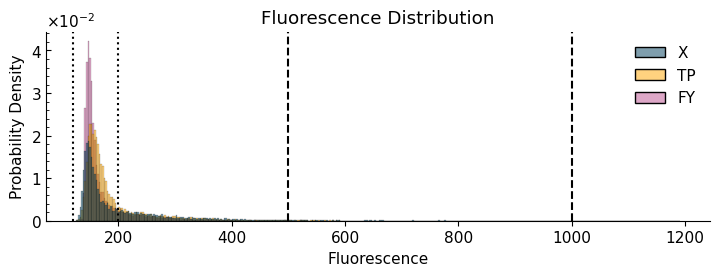

In [66]:


fig3, ax = plt.subplots(figsize = (3.54*2,2.65), layout = "constrained")



ax = sns.histplot(data = df,
            x = "AB_adj",
            hue = "Group1",
            ax = ax,
            palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"],
            legend = True,
            kde = False,
            stat = "probability")
ax.axvline(500, color = "k", linestyle = "--")
ax.axvline(1000, color = "k", linestyle = "--")
ax.axvline(120, color = "k", linestyle = ":")
ax.axvline(200, color = "k", linestyle = ":")
ax.ticklabel_format(axis = "y",style = "sci", scilimits=(0,0),useMathText=True)
ax = prettify(ax,
              title = "Fluorescence Distribution",
              x = ("Fluorescence",""),
              y = ("Probability Density",""))
ax.tick_params(axis = "x",direction = "out")
legend = ax.get_legend()

legend.set_title('')
legend.get_frame().set_alpha(0)

fig3.savefig("../../plots/Dist.svg")



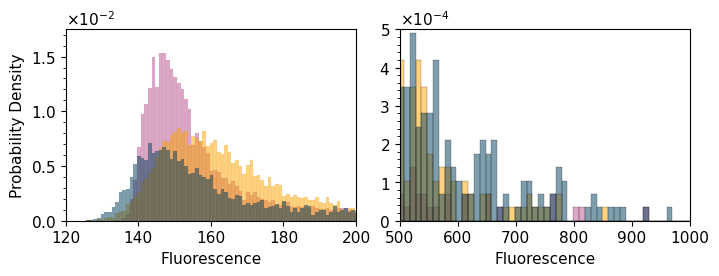

In [67]:
fig4, axs = plt.subplots(1,2,figsize = (3.54*2,2.65), layout = "constrained")
ax = axs[1]

ax = sns.histplot(data = df,
            x = "AB_adj",
            hue = "Group1",
            ax = ax,
            palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"],
            legend = False,
            kde = False,
            binwidth=10,
            stat = "probability")
ax.set_xlim(500,1000)
ax.set_ylim(0,0.0005)
ax.ticklabel_format(axis = "y",style = "sci", scilimits=(0,0),useMathText=True)
ax = prettify(ax,
              title = "",
              x = ("Fluorescence",""),
              y = ("",""))
ax.tick_params(axis = "x",bottom = True, direction = "out", labelbottom = True)
ax.tick_params(axis = "y",which ="both",left = True, labelleft = True, direction = "out")
ax.spines[['right', 'top']].set_visible(True)

ax = axs[0]


ax = sns.histplot(data = df,
            x = "AB_adj",
            hue = "Group1",
            ax = ax,
            palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"],
            legend = False,
            kde = False,
            binwidth=1,
            stat = "probability")
ax.set_xlim(120,200)
ax.set_ylim(0,0.0175)
ax.ticklabel_format(axis = "y",style = "sci", scilimits=(0,0),useMathText=True)
ax = prettify(ax,
              title = "",
              x = ("Fluorescence",""),
              y = ("Probability Density",""))
ax.tick_params(axis = "x",bottom = True, direction = "out", labelbottom = True)
ax.tick_params(axis = "y",which ="both",left = True, labelleft = True, direction = "out")
ax.spines[['right', 'top']].set_visible(True)

fig4.savefig("../../plots/Dist_lo.svg")


In [68]:
# from sklearn.mixture import GaussianMixture
# def get_gmm_means(data,
#                   variable = None,
#                   group = None,
#                   n_iter = 1000):
#     res_df = pd.DataFrame(index=np.arange(n_iter))
#     for g in data[group].unique():
#         data = data.loc[data[group] == g, variable].to_frame()
#         data_vec = data[variable].values
#         classified = GaussianMixture(n_components = 2).fit_predict(data_vec.reshape(-1,1))
#         print(classified.shape)
#         data.loc[data[group] == g, "class"] = classified
#     return res_df.melt().dropna()

# gmm_df = get_gmm_means(df,variable="AB_adj",group="Group1", n_iter = 10)
# gmm_df.head()


In [69]:
def bootstrap_integral(data,
                  variable = None,
                  group = None,
                  n_iter = 1000,
                  lower_bound = 0,
                  upper_bound = 9999):
    res_df = pd.DataFrame(index=np.arange(n_iter))
    for g in data[group].unique():
        data_vec = data.loc[data[group] == g, variable]
        
        shuffled = np.random.choice(data_vec,
                                    size = (len(data_vec), n_iter))
        integral = np.sum(
            np.logical_and(
                shuffled >= lower_bound,
                shuffled <= upper_bound
            ),
            axis = 0
        ).T/len(data_vec)
        res_df[g] = integral
    return res_df.melt()

int_df_hi = bootstrap_integral(df,variable="AB_adj",group="Group1", n_iter = 1000, lower_bound = 500, upper_bound=1000)
int_df_hi.head()

,variable,value
0,X,0.017278
1,X,0.016652
2,X,0.020784
3,X,0.017528
4,X,0.017528


In [70]:
int_res_hi = result()
int_res_hi.df = int_df_hi
int_res_hi.summarize(values = "value",
                     groups = ["variable"]).head()

,mean,sd,ci_lo,ci_hi,count
variable,,,,,
X,0.017553,0.001414,0.017464,0.017647,1000
TP,0.008138,0.000883,0.008088,0.008193,1000
FY,0.002435,0.000457,0.002407,0.002463,1000


In [71]:
int_res_hi.create_p_table().round(decimals=3).head()

,variable,p,star
variable,,,
X,TP,0.0,****
X,FY,0.0,****


In [72]:
int_df_lo = bootstrap_integral(df,variable="AB_adj",group="Group1", n_iter = 1000, lower_bound = 100, upper_bound=200)
int_df_lo.head()

,variable,value
0,X,0.696632
1,X,0.702141
2,X,0.697008
3,X,0.695004
4,X,0.694128


In [73]:
int_res_lo = result()
int_res_lo.df = int_df_lo
int_res_lo.summarize(values = "value",
                     groups = ["variable"]).round(3).head()

,mean,sd,ci_lo,ci_hi,count
variable,,,,,
X,0.696,0.005,0.696,0.696,1000
TP,0.768,0.004,0.768,0.769,1000
FY,0.851,0.004,0.850,0.851,1000


In [74]:
int_res_lo.create_p_table(alternative = "greater").round(decimals=3).head()

,variable,p,star
variable,,,
X,TP,0.0,****
X,FY,0.0,****


/tmp/ipykernel_10810/4093758246.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Ctrl","TP","FY"])
/tmp/ipykernel_10810/4093758246.py:68: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Ctrl","TP","FY"])


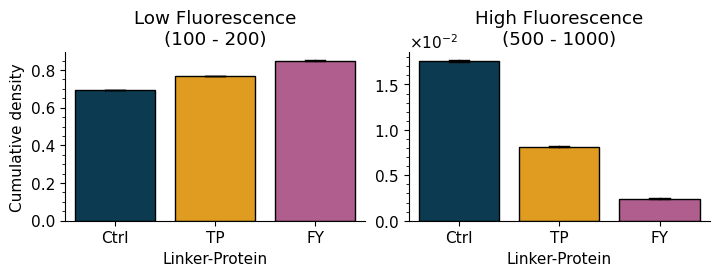

In [75]:
figf,axs = plt.subplots(ncols = 2, figsize = (3.54*2,2.65), layout = "constrained")

# GMM
ax = axs[0]

ax = sns.barplot(data = int_df_lo,
                x = "variable",
                y = "value",
                hue = "variable",
                legend = False,
                ax = ax,
                palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"],
                seed = 888,
                alpha = 1,
                capsize = 0.2,
                err_kws = {
                     "linewidth": 1,
                     "color":"0"
                })
ax = sns.barplot(data = int_df_lo,
                x = "variable",
                y = "value",
                ax = ax,
                color = "k",
                fill = False,
                linewidth = 1,
                errorbar = None)
ax = prettify(ax,
              title = "Low Fluorescence\n(100 - 200)",
              x = ("Linker-Protein",""),
              y = ("Cumulative density",""))
ax.set_xticklabels(["Ctrl","TP","FY"])
ax.tick_params(axis = "x",direction = "out")
ax.tick_params(axis = "y",which="both",direction = "out")

ax = axs[1]

ax = sns.barplot(data = int_df_hi,
                x = "variable",
                y = "value",
                hue = "variable",
                legend = False,
                ax = ax,
                palette = ["#003f5c",
                     "#ffa600",
                     "#bc5090"],
                seed = 888,
                alpha = 1,
                capsize = 0.2,
                err_kws = {
                     "linewidth": 1,
                     "color":"0"
                })
ax = sns.barplot(data = int_df_hi,
                x = "variable",
                y = "value",
                ax = ax,
                color = "k",
                fill = False,
                linewidth = 1,
                errorbar = None)
ax = prettify(ax,
              title = "High Fluorescence\n(500 - 1000)",
              x = ("Linker-Protein",""),
              y = ("",""))
ax.set_xticklabels(["Ctrl","TP","FY"])







ax.tick_params(axis = "x",direction = "out")
ax.tick_params(axis = "y",which="both",direction = "out")
ax.ticklabel_format(axis = "y",style = "sci", scilimits=(0,0),useMathText=True)
figf.savefig("../../plots/Fig3_AUC.svg")
